In [1]:
import corenlp
import os
import re
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ab= "We carried out a four-week double-blind placebo-controlled study comparing remoxipride (n = 20) to chlorpromazine (n = 21) and placebo (n = 21) in the treatment of newly admitted schizophrenic patients with acute exacerbation. Chlorpromazine was found to be significantly better than remoxipride on the dropout rate due to inefficacy, Clinical Global Impression (CGI) of severity of illness and Brief Psychiatric Rating Scale (BPRS). Chlorpromazine tended to be better than placebo on the dropout rate related to inefficacy, Nurse's Global Impression (NGI) of severity and on the BPRS measures of positive symptoms (hallucinatory behaviour and thinking disturbance factor). We were unable to detect a difference between remoxipride and placebo except that remoxipride was better in patients who had previously responded well to neuroleptics. Both drugs induced significantly more parkinsonism than placebo, but differently so: chlorpromazine induced both types of parkinsonism hypo- and hyper-kinetic symptoms, whereas remoxipride induced hyperkinetic symptoms. Chlorpromazine caused more tachycardia, drowsiness, orthostatic dizziness, and dry mouth than the other two treatments, while patients on remoxipride suffered more from insomnia than those on the other two treatments."

In [3]:
def preprocess(ab):
    #make list of sents, same format as lstm paper
    abList= ab
    
def makeList(ab):#returns tokenized list from parameter abstract: (Sentence level) 
    with corenlp.CoreNLPClient(annotators="tokenize ssplit".split()) as client:
        ann = client.annotate(ab)
    sentences = ann.sentence
    #print(len(sentences))
    sentList=[[" ".join(t.originalText for t in sent.token)] for sent in sentences] #join word tokens to rebuild sentences
    return sentList

def makeTokens(ab):#returns tokenized list (word level) from parameter abstract
    with corenlp.CoreNLPClient(annotators="tokenize ssplit".split()) as client:#corenlp server tokenises and keeps info on sentence structure
        ann = client.annotate(ab)
    sentences = ann.sentence
    #print(len(sentences))
    sentList=[[t.originalText for t in sent.token] for sent in sentences] 
    return sentList

def makeTxt(content, ID, path='abstractsTokenized.txt'):
    OUTPUT_DIR=os.getcwd()
    f = open(os.path.join(OUTPUT_DIR, path), 'a')#write new file to current work directory
    f.writelines('###{0}:\n'.format(ID))#header line for abstract like '###247:'
    for t in content:
        newLine = re.sub('\d+([.,]\d+)?', '@',''.join(t))#normalise any number to @ sign for each sentence string
        f.writelines(newLine+'\n')
        
    f.writelines('\n')    
        
    f.close()
    
def MultiprocessingMakeTxt(content):
    path='abstractsTokenized.p'
    tokens= makeTokens(content)
    tokensNorm=[[re.sub('\d+([.,]\d+)?', '@', i) for i in sent]for sent in tokens]
    #print(tokensNorm)
    OUTPUT_DIR=os.getcwd()
    #with  as fp:#write new file to current work directory
    try:
        data=pickle.load(open('abstractsTokenized.p', 'rb'))
        for tok in tokensNorm:
            data.append(tok)
        pickle.dump(data, open(os.path.join(OUTPUT_DIR, path), 'wb'))
    except:
        pickle.dump(tokensNorm, open(os.path.join(OUTPUT_DIR, path), 'wb'))
    

In [4]:
for i in range(2):###testing the pickeling of the list
    MultiprocessingMakeTxt(ab)



In [5]:
data=pickle.load(open('abstractsTokenized.p', 'rb'))
print(data[30120:35120])

[['喹硫平组患者给予富马酸喹硫平片', ',', '舒必利组患者给予舒必利片', ',', '比较两组患者阳性与阴性症状量表', '(', 'PANSS', ')', '评分', '、', '血脂水平', '〔', '总胆固醇', '(', 'TC', ')', '、', '三酰甘油', '(', 'TG', ')', '、', '高密度脂蛋白胆固醇', '(', 'HDL-C', ')', '和低密度脂蛋白胆固醇', '(', 'LDL-C', ')', '〕', '、', '空腹血糖', '(', 'FBG', ')', '、', '糖化血红蛋白', '(', 'Hb', 'A@c', ')', '、', '体质量及体质指数', '(', 'BMI', ')', '。'], ['结果治疗前', '、', '后两组患者PANSS评分比较', ',', '差异无统计学意义', '(', 'P', '>', '@', ')', ';', '治疗后两组患者PANSS评分低于治疗前', ',', '差异有统计学意义', '(', 'P', '<', '@', ')', '。'], ['治疗前两组患者血脂水平比较', ',', '差异无统计学意义', '(', 'P', '>', '@', ')', ';', '治疗后喹硫平组患者TC', '、', 'TG', '、', 'LDL-C水平低于舒必利组', ',', 'HDL-C水平高于舒必利组', ',', '差异有统计学意义', '(', 'P', '<', '@', ')', '。'], ['治疗前两组患者FBG', '、', 'Hb', 'A@c比较', ',', '差异无统计学意义', '(', 'P', '>', '@', ')', ';', '治疗后喹硫平组患者FBG', '、', 'Hb', 'A@c低于舒必利组', ',', '差异有统计学意义', '(', 'P', '<', '@', ')', '。'], ['治疗前两组患者体质量', '、', 'BMI比较', ',', '差异无统计学意义', '(', 'P', '>', '@', ')', ';', '治疗后喹硫平组患者体质量', '、', 'BMI低于舒必利组', ',', '差异有统计学意义', '(', 'P', '<', '@', ')',

___MEERKAT DATA COLLECTION___

In [5]:
####make a bash script to export every table in the access database with mdb, I need them as .csv
meerkatPath='/home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb'
destination='/home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/'

tables='tblCRGKeyword tblDesign tblExportDef tblHealthCareCondition tblImportDef tblImportedReports tblMethodofAllocation tblMyGroupInformation tblOptions tblOutcome tblParticipant tblPublicationType tblReportCRGKeyword tblReportExternalID tblReportReviewer tblReview tblReviewer tblReviewerImport tblReviewerKeyword tblReviewImport tblReviewTopic tblSavedSearch tblSearchFieldsDef tblSearchLines tblStudy tblStudyCRGInterest tblStudyDesign tblStudyHealthCareCondition tblStudyIntervention tblStudyMethod tblStudyOutcome tblStudyParticipant tblStudyReport tblStudyReview tblStudyTopic tblSwitchboardItems tblTempRefToRev tblTempSearchLine tblTopic tblTopicImport tblTypeofReport tblUnlinkedStudies tblIntervention tblReport'
tList=tables.split()
script=['mdb-export '+ meerkatPath + ' ' + tbl +' > ' + destination + tbl + '.csv' for tbl in tList]
script.insert(0, '#!/bin/bash')

f = open(os.path.join(os.getcwd(), 'meerkatScraper.sh'), 'w')
for line in script:
    f.writelines(line+'\n')
f.close()

script

['#!/bin/bash',
 'mdb-export /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb tblCRGKeyword > /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/tblCRGKeyword.csv',
 'mdb-export /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb tblDesign > /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/tblDesign.csv',
 'mdb-export /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb tblExportDef > /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/tblExportDef.csv',
 'mdb-export /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb tblHealthCareCondition > /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/tblHealthCareCondition.csv',
 'mdb-export /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb tblImportDef > /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/tblImportDef.csv',
 'mdb-export /home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatBE.mdb tblImportedReports >

In [6]:
##after running script on command line, read data from csvs into dictionaries
###used for spreadsheets of ID, description format:
#'pickles/dict_tblIntervention.p'

def makePickle(name, path, keys=1, vals =2):#for getting numerical ids and their string description
    df=pd.read_csv(path)
    dic={row[keys]:row[vals] for row in df.itertuples()}##ID as key and description as values in dict
    print(dic)
    with open(name, 'wb') as f:
        pickle.dump(dic, f)
    return dic

def makePickleList(name, path, keys=1, vals =2):#for getting numerical ids and values as lists
    #here, each ID can have multiple values
    df=pd.read_csv(path)
    
    dic={}
    for row in df.itertuples():
        if row[keys] not in dic.keys():
            dic[row[keys]]=[row[vals]]#create entry
        else:
            dic[row[keys]].append(row[vals])
    
    #print(dic)
    with open(name, 'wb') as f:
        pickle.dump(dic, f)
    return dic

def makePickleTuple(name, path, keys=1, val1 =2, val2 =3):#for getting numerical ids and values as tuple
    df=pd.read_csv(path)
    dic={row[keys]:(row[val1], row[val2]) for row in df.itertuples()}##ID as key and descriptios as values in dict
    print(dic)
    with open(name, 'wb') as f:
        pickle.dump(dic, f)
    return dic

class ReportReference:#class to store rows of external report ids
    def __init__(self, a,b,c,d,e,f):
        self.CRGReportID = a
        self.ExternalID = b
        self.Description = c
        self.URL = d
        self.IndexingTerms = e
        self.Medline = f
class Report:
    def __init__(self, col):
        self.CENTRALReportID = col[1]
        self.CRGReportID = col[2]
        self.Title = col[3]
        self.Notes = col[4]
        self.ReportNumber = col[5]
        self.OriginalTitle = col[6]
        self.Authors = col[7]
        self.Journal = col[8]
        self.Year = col[9]
        self.Volume = col[10]
        self.Issue = col[11]
        self.Pages = col[12]
        self.Language = col[13]
        self.Abstract = col[14]
        self.CENTRALSubmissionStatus = col[15]
        self.CopyStatus = col[16]
        self.DatetoCENTRAL = col[17]
        self.Dateentered = col[18]
        self.DateEdited = col[19]
        self.Editors = col[20]
        self.Publisher = col[21]
        self.City = col[22]
        self.DupString = col[23]
        self.TypeofReportID = col[24]
        self.PublicationTypeID = col[25]
        self.Edition = col[26]
        self.Medium = col[27]
        self.UDef1 = col[28]
        self.UDef2 = col[29]
        self.UDef3 = col[30]
        self.UDef4 = col[31]
        self.UDef5 = col[32]
        self.UDef6 = col[33]
        self.UDef7 = col[34]
        self.UDef9 = col[35]
        self.UDef10 = col[36]
        self.UDef8 = col[37]
      
class Study:
    def __init__(self, col):
        self.CENTRALStudyID = col[1]
        self.CRGStudyID = col[2]
        self.ShortName = col[3]
        self.StatusofStudy = col[4]
        self.TrialistContactDetails = col[5]
        self.CENTRALSubmissionStatus = col[6]
        self.Notes = col[7]
        self.DateEntered = col[8]
        self.DateToCENTRAL = col[9]
        self.DateEdited = col[10]
        self.Search_Tagged = col[11]
        self.UDef1 = col[12]
        self.UDef2 = col[13]###the country
        self.UDef3 = col[14]
        self.UDef4 = col[15]
        self.UDef5 = col[16]#the comparisons raw string
        self.interventions = self.cleanI(col[16])
        self.ISRCTN = col[17]
        self.UDef6 = col[18]
        self.UDef7 = col[19]
        self.UDef8 = col[20]
        self.UDef10 = col[21]
        self.UDef9 = col[22]
        
        
        
    def cleanI(self, raw):#splits and cleans intervention strings 
        
        if isinstance(raw, float):##will be null if line is empty, and unusable if it is actually some float
            return []
            
        comparisons=[comp for comp in raw.split('//')]
        values=[]
        
        for entry in comparisons:
            
            
                
            I = re.split('[\b\s]vs\.?[\b\s]', entry)#split at 'vs' that is enclosed by whitespace or word boundary, with optional literal fullstop
            if len(I) >= 2:#2 comparisons, classic comparison of interventions
                for val in I:
                    val = self._cleaner(val)
                    if len(val) >=1 :#if there is something left after cleaning
                        values.append(val) 
                
            elif len(I) == 1:
                val = I[0].strip()#unnecessary whitespace
                val = re.sub(r'(^{)(.+)(}$)', r'\2', val)#substitute only with middle part in order to get rud of curly brackets on sentence boundaries only, still need to figure out what to do with curly brackets inside
                val = self._cleaner(val)
                if len(val) >=1 :#if there is something left after cleaning
                    values.append(val) 
                    #print(val)
        #print(values)    
                
        return values         
              
                    
    def _cleaner(self, val):
        if ('{' in val and not '}'in val):#replace lonely brackets
             val=val.replace('{', '')
        elif ('}'in val and not '{'in val):
             val=val.replace('}', '')
        val= val.strip()#remove whitespace and capitalise first letter only if there are at least 2 chars left
        val = re.sub('(?<=^)[*+^]', '', val)#pos lookahead to remove special chars at front only
        val = re.sub('{.+}','',val).strip()#delete tags in curly braces
        if len(val) >=2 :
            val= "{0}{1}".format(val[0].upper(), val[1:]).strip()     
            #print (val)
        return val
                
       
def makePickleObjects(name, path, types, keys=1):#for getting numerical ids and values as lists
    #here, each ID can have multiple values
    df=pd.read_csv(path)
    dic={}
    
    for row in df.itertuples():
        if types=='externalID':##creating objects to store data
            obj = ReportReference(row[1],row[2],row[3],row[4],row[5],row[6])
        elif types =='report' :
            obj = Report(row)
        elif types =='study' :
            obj = Study(row)    
            #print(obj.Title)
         #####making the dict entry, or adding obj to list       
        if row[keys] not in dic.keys():
            dic[row[keys]]=[obj]#create entry
        else:
            dic[row[keys]].append(obj)
    
    #print(dic)
    with open(name, 'wb') as f:
        pickle.dump(dic, f)
    return dic    
    
source = '/home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/'

In [7]:
print(len('Abstract not available'))

##todo wordembeddings evaluations
##plot distribution of cosine similarities of all words to one target for evaluation of word embeddings

22


In [8]:

# CRGReportID and abstracts, authors, udef fields ... 
report_vals= makePickleObjects('pickles/dict_tblReport.p',##save to subfolder in directory of this notebook
         source + 'tblReport.csv', 'report', keys=2)
#print(report_vals[148][0].Abstract)#some abstract

###data from study csv
study_vals= makePickleObjects('pickles/dict_tblStudy.p',##save to subfolder in directory of this notebook
         source + 'tblStudy.csv', 'study', keys=2)
interventionFrequency={}
#print(study_vals)   
for key in study_vals.keys():#get most frequent interventions
    for intervention in study_vals[key][0].interventions:
        interventionFrequency[intervention] = interventionFrequency.get(intervention, 0) + 1
     
#print(study_vals[142][0].UDef5)#some name

#to create list of attributes from the csv
#dat = pd.read_csv('/home/lena/Dokumente/Master/dissertation/Data/CSZG/MeerKatCSV/tblStudy.csv')
#col = dat.columns
#nr=1
#for name in col:#create fields and parameter initialisation automatically for different spreadsheets and classes
#    print('{0}{1}{2}{3}{4}'.format('self.', name, ' = col[', nr , ']'))
#    nr += 1
    
#1781 one pieced interventions    

/home/lena/anaconda3/envs/masters/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


8533


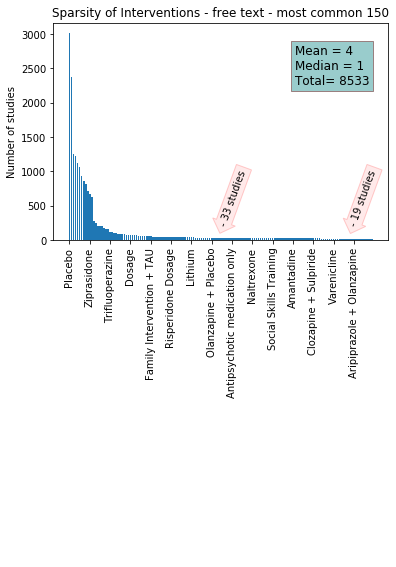

4.2316887378413215
1.0
[3017, 2369, 1256, 1231, 1129, 1065, 934, 864, 819, 714, 670, 621, 277, 247, 207, 204, 201, 181, 162, 160, 124, 113, 107, 98, 95, 94, 93, 83, 79, 77, 76, 71, 71, 68, 65, 60, 58, 57, 56, 56, 52, 51, 49, 47, 47, 46, 45, 44, 43, 43, 43, 43, 42, 42, 41, 40, 40, 39, 39, 39, 38, 38, 37, 36, 36, 35, 35, 35, 35, 35, 34, 34, 34, 34, 33, 32, 32, 32, 32, 31, 31, 30, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19]


In [9]:
#sorted(interventionFrequency.values(), reverse=True)
# Create a list of tuples sorted by index 1 i.e. value field     
listofTuples = sorted(interventionFrequency.items() , reverse=True, key=lambda x: x[1])
y=[] 
names=[]
# Iterate over the sorted sequence
for elem in listofTuples :
    #print(elem[0] , " -->" , elem[1] ) 
    y.append(elem[1])
    names.append(elem[0])
print(len(y))  
x= np.arange(len(y))

nr=150
plt.bar(names[:nr], y[:nr])
plt.xticks(x[:nr], names[:nr], rotation='vertical')
plt.text(0.72, 0.9, "Mean = 4 \nMedian = 1 \nTotal= 8533", size=12,transform=plt.gca().transAxes,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(.6, 0.5, 0.5),
                   fc=(.6, 0.8, 0.8),
                   )
         
         )
plt.text(0.97, 0.33, "- 19 studies", size=10, rotation=70., transform=plt.gca().transAxes,
         ha="right", va="top",
         bbox=dict(boxstyle="larrow",alpha=0.4,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(0.58, 0.33, "- 33 studies", size=10, rotation=70., transform=plt.gca().transAxes,
         ha="right", va="top",
         bbox=dict(boxstyle="larrow",alpha=0.4, 
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.ylabel('Number of studies')
plt.title('Sparsity of Interventions - free text - most common 150')

xticks = plt.gca().xaxis.get_major_ticks()

for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)
plt.show()

mean = np.mean(y)###info nrs
print(mean)
print(np.median(y))
print(y[:nr])

#######################cleaned intervention names, to be used in tagging regex
I_freeText= names

In [22]:
########################Tokenize abstracts, but keep sentences split on word level & normalising 9,7 to @
#count=0
#for key, value in report_vals.items():####go through report objects and access the abstract variables
    #for report in value:
       # if not isinstance(report.Abstract, float) and len(report.Abstract) >= 40:#there are some empty fields that come up as null
           # l1= makeList(report.Abstract)
           # makeTxt(l1, key)
           # count +=1
           # if (count % 100 == 0):
               # print('Nr done: {0}'.format(count))
import psutil
from multiprocess import Pool
import time

startID= False

abstracts=[]
for key, value in report_vals.items():####go through report objects and access the abstract variables
    for report in value:
        ##################################to restart splitting from a crtain abstract
        if report.CRGReportID== 15590:
            startID= True
            print('found point to restart')
        ####################################creating abstract list to be processed    
        if startID == True :
            #print('adding')
            if not isinstance(report.Abstract, float) and len(report.Abstract) >= 40:#there are some empty fields that come up as null
                abstracts.append(report.Abstract)
print('Created list of abstracts')
print(len(abstracts))
######################################use multile cores to make it run more efficiently
psutil.cpu_count(logical=False)
pool=Pool(psutil.cpu_count(logical=False))

pool.map(MultiprocessingMakeTxt, abstracts)   
print('Finished') 
pool.close()

found point to restart
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
addi

adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding

adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding

adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding

adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding

adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding

adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding
adding

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [100]:
from tqdm import tqdm
for i in tqdm(range(100000)):
    d = [1,2,3]
    e = d.append(2)

100%|██████████| 100000/100000 [00:00<00:00, 1644676.75it/s]


In [111]:


###########preprocess all abstracts by splitting with stanfordcorenlp & normalising 9,7 to @
count=0
for key, value in report_vals.items():
    for report in value:
        if not isinstance(report.Abstract, float) and len(report.Abstract) >= 40:#there are some empty fields that come up as null
            l1= makeList(report.Abstract)
            makeTxt(l1, key)
            count +=1
            if (count % 100 == 0):
                print('Nr done: {0}'.format(count))
       
        



/home/lena/anaconda3/envs/masters/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Nr done: 100
Nr done: 200
Nr done: 300
Nr done: 400
Nr done: 500
Nr done: 600
Nr done: 700
Nr done: 800
Nr done: 900
Nr done: 1000
Nr done: 1100
Nr done: 1200
Nr done: 1300
Nr done: 1400
Nr done: 1500
Nr done: 1600
Nr done: 1700
Nr done: 1800
Nr done: 1900
Nr done: 2000
Nr done: 2100
Nr done: 2200
Nr done: 2300
Nr done: 2400
Nr done: 2500
Nr done: 2600
Nr done: 2700
Nr done: 2800
Nr done: 2900
Nr done: 3000
Nr done: 3100
Nr done: 3200
Nr done: 3300
Nr done: 3400
Nr done: 3500
Nr done: 3600
Nr done: 3700
Nr done: 3800
Nr done: 3900
Nr done: 4000
Nr done: 4100
Nr done: 4200
Nr done: 4300
Nr done: 4400
Nr done: 4500
Nr done: 4600
Nr done: 4700
Nr done: 4800
Nr done: 4900
Nr done: 5000
Nr done: 5100
Nr done: 5200
Nr done: 5300
Nr done: 5400
Nr done: 5500
Nr done: 5600
Nr done: 5700
Nr done: 5800
Nr done: 5900
Nr done: 6000
Nr done: 6100
Nr done: 6200
Nr done: 6300
Nr done: 6400
Nr done: 6500
Nr done: 6600
Nr done: 6700
Nr done: 6800
Nr done: 6900
Nr done: 7000
Nr done: 7100
Nr done: 7200
N

In [10]:
# CRGReportID and a list of external IDs for this 
external_vals= makePickleObjects('pickles/dict_tblReportExternalID.p',##save to subfolder in directory of this notebook
         source + 'tblReportExternalID.csv', 'externalID')
print(external_vals[18992][0].ExternalID)

#dict1 = pickle.load(open("pickles/dict_tblReportExternalID.p", "rb"))
#print(dict1[18992][0].ExternalID)

CN-00374977


In [11]:
# CRGTopicID and description plus parent ID: could construct tree frpm these tuples
topic_ID= makePickleTuple('pickles/dict_tblTopic.p',##save to subfolder in directory of this notebook
         source + 'tblTopic.csv')

{486: ('Ziprazidone / Benzothiazolylpiperazine / CP-88,059-1', 457.0), 488: ('Zotepine / Dibenzothiepine', 457.0), 490: ('Benzamide', 448.0), 491: ('Amisulpride', 490.0), 493: ('Levosulpiride', 490.0), 494: ('Remoxipride', 490.0), 495: ('controlled release formulation', 494.0), 496: ('immediate release formulation', 494.0), 497: ('retard', 494.0), 498: ('Sulpiride / Dogmatil / Dolmatil', 490.0), 500: ('Benzimdazole', 448.0), 501: ('Carpipramine', 500.0), 502: ('Clopimozide', 500.0), 503: ('Benzimidazolidines', 448.0), 504: ('Milenperone / R-34009', 503.0), 505: ('Butyrophenone', 448.0), 506: ('AL-1021 / carperone', 505.0), 507: ('Benperidol', 505.0), 508: ('Bromperidol', 505.0), 510: ('Centbutindole', 505.0), 511: ('Dipiperon', 505.0), 512: ('Droperidol / dehydrobenzperidol', 505.0), 514: ('unspecified', 505.0), 515: ('Haloperidol', 505.0), 518: ('Haloperidol - combination', 505.0), 519: ('amitriptyline', 518.0), 520: ('anticholinergic', 518.0), 521: ('carbamazepine', 518.0), 522: ('va

In [12]:
# CRGStudyID and OutcomeID: What is outcomes method of this study, options defined in outc_ID dict
outcome_vals= makePickleList('pickles/dict_tblStudyOutcome.p',##save to subfolder in directory of this notebook
         source + 'tblStudyOutcome.csv')

In [13]:
# CRGStudyID and MethodofAllocationID: What is allocation method of this study, options defined in methods dict
method_vals= makePickleList('pickles/dict_tblStudyMethod.p',##save to subfolder in directory of this notebook
         source + 'tblStudyMethod.csv')

In [14]:
# CRGStudyID and HealthCareConditionID: What is interventions of this study, options defined in hc condition dict
hcCondition_vals= makePickleList('pickles/dict_tblStudyHealthCareCondition.p',##save to subfolder in directory of this notebook
         source + 'tblStudyHealthCareCondition.csv')

In [15]:
# CRGStudyID and ParticipantsID:adults/kids etc this study, options defined in participants dict
partic_vals= makePickleList('pickles/dict_tblStudyParticipant.p',##save to subfolder in directory of this notebook
         source + 'tblStudyParticipant.csv')

In [16]:
# CRGStudyID and ReportID:map study to multiple records
study_report= makePickleList('pickles/dict_tblStudyReport.p',##save to subfolder in directory of this notebook
         source + 'tblStudyReport.csv', 2, 3)#use columns 2 and 3, not usind 1: 

In [17]:
# CRGReportID and CRGKeywordID: What is keywords for each report, options defined in crg keywords dict
rep_keyw_vals= makePickleList('pickles/dict_tblReportCRGKeyword.p',##save to subfolder in directory of this notebook
         source + 'tblReportCRGKeyword.csv')

In [18]:
# CRGStudyID and DesignID: What is design method of this study, 2 options defined in design_ID dict
design_vals= makePickleList('pickles/dict_tblStudyDesign.p',##save to subfolder in directory of this notebook
         source + 'tblStudyDesign.csv')

In [19]:
#InterventionID
int_ID= makePickle('pickles/dict_tblIntervention.p',##save to subfolder in directory of this notebook
         source + 'tblIntervention.csv')
print(len(int_ID.keys()))

{4110: 'Psychoeducation {PSY}', 7369: 'UH 232 {N05A-Nervous-Antipsychotics} {Pharm} {Research Drug-Adis-Stopped}', 7425: 'Resting Period {XXX}', 7434: '2 Deoxy D Glucose {ANEO} {GLA} {Pharm} {Research Drug-Adis-Developing}*', 7439: 'Recall {XXX}', 7457: 'Oxitriptan {WHO-N06AX01-Nervous-Antidepressants} {Pharm}', 7476: 'Abbott 30360 {N05A-Nervous-Antipsychotics} {Pharm} {ANA} {TRA} {Research Drug-Stopped}', 7480: 'ABT 288 {N05A-Nervous-Antipsychotics} {Pharm} {H3A} {Research Drug-Adis-Stopped}', 7481: 'ABT 925 {N05AB-Nervous-Antipsychotics} {Pharm} {D3A} {Research Drug-Adis-Stopped}', 7482: 'Acamprosate {WHO-N07BB03-Nervous-Antialcoholism} {Pharm} {BNF-Antialcoholism}', 7485: 'Vocational Rehabilitation (Accelerated) {WOR}', 7486: 'Acceptance and Commitment Therapy {PSY}', 7488: 'Acepromazine {WHO-N05AA04-Nervous-Antipsychotics} {Pharm} {Market: Withdrawn}', 7489: 'Acetazolamide {WHO-S01EC01-Sensory-Antiglaucoma-Carbonic Anhydrase Inhibitors} {Pharm}', 7491: 'Acetophenazine {WHO-N05AB07-

In [20]:
#CRGKeywordID 
crgKey_ID= makePickle('pickles/dict_tblCRGKeyword.p',
          source + 'tblCRGKeyword.csv')

{1: 'ECT', 3: 'Chlorpromazine', 4: 'Risperidone', 5: 'Perphenazine', 6: 'Substance abuse and schizophrenia', 7: 'Tardive Dyskinesia', 8: 'Clozapine', 9: 'Sulpiride', 10: 'Quetiapine', 13: 'CMHT', 14: 'New antipsychotics', 16: 'First Episode', 17: 'New Antipsychotics and First Episode', 18: 'PRN', 19: 'Benzodiazepines', 21: 'Polydipsia', 22: 'Token Economy', 24: 'Open general medical wards versus specialist psychiatric units', 25: 'Trifluoperazine', 26: 'Compliance Therapy', 27: 'Lithium', 28: 'Chinese Herbal Medicine', 29: 'Low potency', 31: 'Problem', 32: 'Dysfunction', 34: 'Sexual Dysfunction', 35: 'Symptom', 37: 'Zuclopenthixol', 41: 'Art Therapy', 42: 'Velotab', 43: 'Cannabis', 44: 'Polyunsaturated fatty acid', 45: 'Miscellaneous treatments for TD', 46: 'Dyskinesia', 48: 'Placebo', 50: 'CBT', 51: 'Music Therapy', 52: 'Neuroleptic reduction for TD', 55: 'TD No Home', 57: 'Vitamin E for TD ', 58: 'Older Adults', 59: 'Pimozide', 60: 'Thioridazine', 61: 'Fluphenazine', 62: 'Cognitive',

In [21]:
#DesignID just 2 entries
design_ID= makePickle('pickles/dict_tblDesign.p',
          source + 'tblDesign.csv')

{1: 'RCT', 2: 'CCT'}


In [22]:
#HealthCareConditionID
hccondition_ID= makePickle('pickles/dict_tblHealthCareCondition.p',
         source + 'tblHealthCareCondition.csv')

{1177: 'A - Delusional Disorder', 1178: 'A - Healthcare Professionals', 1179: 'A - Healthy Volunteers', 1180: 'A - Family-Lay Carers', 1182: 'A - Schizoaffective Disorder', 1183: 'A - Schizophrenia', 1188: 'B - Not Described', 1189: 'B - Delusional Disorder', 1190: 'B - Healthcare Professionals', 1191: 'B - Healthy Volunteers', 1192: 'B - Family-Lay Carers', 1193: 'B - Psychotic', 1194: 'B - Schizoaffective Disorder', 1195: 'B - Schizophrenia', 1196: 'B - Serious Mental Illness', 1198: 'C - Acute', 1199: 'C - Early Post-Acute', 1200: 'C - Remission', 1203: 'D - Prodromal Illness', 1204: 'D - First Episode', 1205: 'D - Early Illness', 1206: 'D - Chronic-Persistent', 1207: 'D - Late Onset', 1209: 'E - Aggression {Co-Morbidity}', 1210: 'E - Agitation {Co-Morbidity}', 1211: 'E - Akathisia {Adverse Event}', 1213: 'E - Depression {XXX}', 1216: 'E - Movement Disorders {Adverse Event}', 1217: 'E - Negative Symptoms', 1218: 'E - Not Described', 1219: 'E - Parkinsonism {Adverse Event}', 1220: 'E

In [23]:
#MethodofAllocationID
alloc_ID= makePickle('pickles/dict_tblMethodofAllocation.p',
         source + 'tblMethodofAllocation.csv')

{1: 'Cluster randomisation (events)', 2: 'Cluster randomisation (wards)', 3: 'Cluster randomisation (families)', 4: 'Cluster randomisation (homes)', 6: 'Crossover', 7: 'Blinding - open-label', 9: 'Blinding - unclear', 10: 'Blinding - double', 11: 'Blinding - single', 13: 'Cluster randomisation (mental health workers)', 14: 'Blinding - triple', 15: 'Blinding - multi-blind', 16: 'Cluster randomisation (general practices)', 17: 'Cluster randomisation (mental health centres)', 18: 'Factorial', 21: 'Unclear', 22: 'Unclear - requires translation', 24: 'Non blinded', 25: 'Randomised- no further info', 26: 'Block randomisation', 27: 'Randomised - admission order', 28: 'Randomised- tossing a coin', 29: 'Randomised- drawing straws', 30: 'Randomised - date of admission, odd or even', 31: 'Randomised - consultation order', 32: 'Randomised - random number generation', 33: 'Randomised - number of admission, odd or even', 34: 'Randomised - computer random number generation', 35: 'Randomised - admissi

In [24]:
#OutcomeID
outc_ID= makePickle('pickles/dict_tblOutcome.p',
         source + 'tblOutcome.csv')

{1: 'Global improvement / deterioration', 2: 'Mental State', 3: 'Adverse effects', 4: 'Physical tests', 5: 'Brief Psychiatric Rating Scale (BPRS)', 6: 'Clinical Global Impression (CGI)', 7: 'Positive and Negative Syndrome Scale for Schizophrenia (PANSS)', 8: 'Barnes Akathisia Scale (BAS)', 10: 'Abnormal Involuntary Movement Scale (AIMS)', 13: 'Scale for the Assessment of Negative Symptoms (SANS)', 15: 'Social Function', 16: 'Health behaviour', 17: 'Admissions / discharge', 19: 'Relapse', 20: 'Satisfaction with treatment - participant', 21: 'Satisfaction with treatment - carer', 22: 'Quality of life', 23: 'Assessments / contacts', 24: 'Quality of Life Scale (QLS)', 26: 'Psychological tests', 27: 'Rorschach Inkblot Test', 28: 'Multidimensional Scale for Rating Psychiatric Patients (MSRPP)', 30: 'Wechsler Memory Scale (WMS)', 31: 'Zung Self-Rating Depression Scale', 32: 'Hamilton Depression Scale (HAM-D / HDRS)', 33: 'Evaluation of Social Functioning Form (ESFF)', 35: 'Inpatient Multidime

In [25]:
#ParticipantsID
partic_ID= makePickle('pickles/dict_tblParticipant.p',
         source + 'tblParticipant.csv')

{7: 'Male', 9: 'Female', 10: 'Child', 18: 'Adolescent', 33: 'Older Adult', 56: 'Adult'}


In [26]:
#PublicationTypeID
pub_ID= makePickle('pickles/dict_tblPublicationType.p',
         source + 'tblPublicationType.csv')

{1: 'Journal article', 2: 'Book', 3: 'Section of book', 4: 'Conference proceedings', 5: 'Correspondence', 6: 'Computer program', 7: 'Unpublished data', 8: 'Other', 9: 'Cochrane review'}


In [27]:
#TypeofReportID
reptype_ID= makePickle('pickles/dict_tblTypeofReport.p',
         source + 'tblTypeofReport.csv')

{1: 'Abstract', 2: 'Full paper', 3: 'Other'}


In [28]:
#review_id has cd number and title for most. Some CDs are empty, these review titles will be lost!
review_ID= makePickle('pickles/dict_tblReview.p',
         source + 'tblReview.csv', 1,3)#data is in different columns here

{'CD003441': "'As required' medication regimens for seriously mentally ill people in hospital", 'CD003727': 'Anticholinergics for neuroleptic-induced acute akathisia', 'CD002305': 'Antidepressants for people with both schizophrenia and depression', 'CD004027': 'Antipsychotic medication for childhood-onset schizophrenia', 'CD000030': 'Antipsychotic medication versus placebo for people with both schizophrenia and learning disability', 'CD001089': 'Assertive community treatment for people with severe mental disorders', 'CD000205': 'Benzodiazepines for neuroleptic-induced tardive dyskinesia', 'CD000234': 'Beta-blocker supplementation of standard drug treatment for schizophrenia', 'CD000206': 'Calcium channel blockers for neuroleptic-induced tardive dyskinesia', 'CD001258': 'Carbamazepine for schizophrenia', 'CD000050': 'Case management for people with severe mental disorders', 'CD001946': 'Central action beta-blockers versus placebo for neuroleptic-induced acute akathisia', 'CD000207': 'Ch

2673
17.154882154882156
2.0


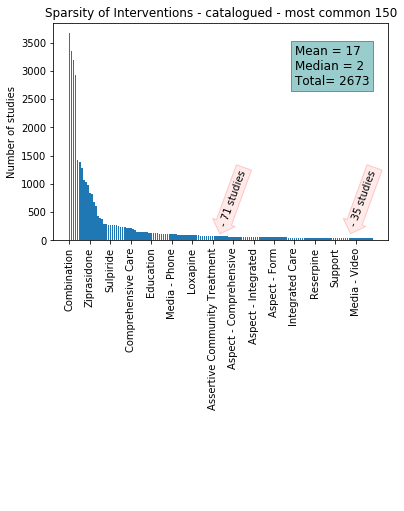

[3667, 3360, 3190, 2924, 1428, 1387, 1277, 1066, 1041, 978, 834, 817, 680, 599, 422, 389, 377, 291, 288, 279, 278, 278, 276, 263, 255, 242, 238, 227, 225, 218, 216, 196, 182, 153, 151, 151, 146, 144, 140, 130, 128, 127, 126, 121, 118, 117, 117, 117, 114, 113, 111, 111, 103, 102, 100, 99, 98, 95, 94, 88, 87, 86, 86, 86, 84, 81, 80, 78, 78, 77, 76, 76, 75, 74, 71]
['Combination', 'Treatment as Usual', 'Placebo', 'Risperidone', 'Olanzapine', 'Aripiprazole', 'Clozapine', 'Haloperidol', 'Antipsychotics *', 'Quetiapine', 'Ziprasidone', 'Chlorpromazine', 'Aspect - Dosage', 'Control', 'Cognitive Behavior Therapy', 'Sham', 'Amisulpride', 'Route - Injection', 'Psychoeducation', 'Pharmacotherapy', 'Sulpiride', 'Health Education', 'Paliperidone', 'rTMS: Repetitive Transcranial Magnetic Stimulation', 'Perphenazine', 'Aspect - Group Therapy', 'ECT: Electroconvulsive Therapy', 'Cognitive Remediation', 'Psychotherapy', 'Maintenance Treatment', 'Comprehensive Care', 'Media - Computer', 'Family Interven

In [29]:
# CRGStudyID and InterventionID: What is interventions of this study, options defined in interventions dict
intervention_vals= makePickleList('pickles/dict_tblStudyIntervention.p',##save to subfolder in directory of this notebook
         source + 'tblStudyIntervention.csv')
intDict={}
for key in intervention_vals.keys():#get most frequent interventions
    for intervention in intervention_vals[key]:
        intDict[intervention] = intDict.get(intervention, 0) + 1
     
##################################################################################plot most common interventions to reveal sparsity
listofTuples = sorted(intDict.items() , reverse=True, key=lambda x: x[1])
y=[] 
codes=[]
# Iterate over the sorted sequence
for elem in listofTuples :
    #print(elem[0] , " -->" , elem[1] ) 
    y.append(elem[1])
    codes.append(elem[0])
print(len(y))  
x= np.arange(len(y))

############cleaning
names2 = [re.sub('{.+}','',int_ID[key]).strip() for key in codes]#get intervention names from dict, but clean tags away
##############
nr=150
plt.bar(names2[:nr], y[:nr])
plt.xticks(x[:nr], names2[:nr], rotation='vertical')
plt.text(0.72, 0.9, "Mean = 17 \nMedian = 2 \nTotal= 2673", size=12,transform=plt.gca().transAxes,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(.6, 0.5, 0.5),
                   fc=(.6, 0.8, 0.8),
                   )
         
         )
plt.text(0.97, 0.33, "- 35 studies", size=10, rotation=70., transform=plt.gca().transAxes,
         ha="right", va="top",
         bbox=dict(boxstyle="larrow",alpha=0.4,
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(0.58, 0.33, "- 71 studies", size=10, rotation=70., transform=plt.gca().transAxes,
         ha="right", va="top",
         bbox=dict(boxstyle="larrow",alpha=0.4, 
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.ylabel('Number of studies')
plt.title('Sparsity of Interventions - catalogued - most common 150')

xticks = plt.gca().xaxis.get_major_ticks()
mean = np.mean(y)
print(mean)
print(np.median(y))
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)
plt.show()
print(y[:75])
print(names2[:75])

__Make collection of intervention names and use them for tagging sentences with 'I' tag__

In [33]:


print(len(names2))#batch of clean names
allInterventions= names2.copy()
for I in I_freeText:#add them all together to get biggest database on schizophrenia intervention names
    if I not in allInterventions:
        allInterventions.append(I)
print(len(allInterventions))  

allInterventions= [re.sub('\*', "", inter) for inter in allInterventions]
allInterventions= [re.sub('}', "", inter) for inter in allInterventions]
allInterventions= [re.sub('{', "", inter) for inter in allInterventions]
print(len(allInterventions)) 
print(allInterventions)

2673
10313
10313
['Combination', 'Treatment as Usual', 'Placebo', 'Risperidone', 'Olanzapine', 'Aripiprazole', 'Clozapine', 'Haloperidol', 'Antipsychotics ', 'Quetiapine', 'Ziprasidone', 'Chlorpromazine', 'Aspect - Dosage', 'Control', 'Cognitive Behavior Therapy', 'Sham', 'Amisulpride', 'Route - Injection', 'Psychoeducation', 'Pharmacotherapy', 'Sulpiride', 'Health Education', 'Paliperidone', 'rTMS: Repetitive Transcranial Magnetic Stimulation', 'Perphenazine', 'Aspect - Group Therapy', 'ECT: Electroconvulsive Therapy', 'Cognitive Remediation', 'Psychotherapy', 'Maintenance Treatment', 'Comprehensive Care', 'Media - Computer', 'Family Intervention', 'Valproic Acid', 'Route - Long Acting', 'Waitlist', 'Rehabilitation', 'Social Skills Training', 'Case Management', 'Trifluoperazine', 'Education', 'Thioridazine', 'Nursing Intervention', 'Music Therapy', 'Aspect - Type', 'Fluphenazine', 'Fluphenazine Decanoate', 'Aspect - Individual Therapy', 'Exercise', 'Behavioral Intervention', 'Media - 

In [34]:
chineseIntEng=[re.sub('(\[.+\])', '', i).strip() for i in allInterventions if re.search('(\[.+\])', i)]
chinesePure= [re.sub('(.*)(\[)(.+)(\])', r'\3', i) for i in allInterventions if re.search('(\[.+\])', i)]

noAddon=[re.sub('(.*)(\()(.+)(\))(.*)$', r'\1\5', i) if re.search('(\(.+\))', i) else i for i in allInterventions]#clean text in brackets
Addons=[re.sub('(.*)(\()(.+)(\))', r'\3', i) for i in allInterventions if re.search('(\(.+\))', i)]
print(len(noAddon))
noAddon=[re.sub('(.*)(\()(.+)(\))(.*)$', r'\1\5', i) if re.search('(\(.+\))', i) else i for i in noAddon ]#clean text in brackets
Addons2=[re.sub('(.*)(\()(.+)(\))', r'\3', i) for i in noAddon if re.search('(\(.+\))', i)]
print(len(noAddon))
noAddon=[re.sub('(.*)(\()(.+)(\))(.*)$', r'\1\5', i) if re.search('(\(.+\))', i) else i for i in noAddon]#clean text in brackets
Addons3=[re.sub('(.*)(\()(.+)(\))', r'\3', i) for i in noAddon if re.search('(\(.+\))', i)]
print(len(noAddon))#no terms in brackets anymore

for interv in noAddon:
    for i in re.split('\s\+\s', interv):
        if i.strip() not in noAddon:
            print('added ' + i)
            noAddon.append(i.strip())
print(len(noAddon))            
#for intervention  in allInterventions:
    

10313
10313
10313
added Second Generation Antipsychotics 
added First Generation Antipsychotics 
added Clinical Care Pathway 
added Vitamin B9 
added Huperzine A 
added Aspect - Mode 
added Vitamin B12a 
added Amfetamine 
added Cannabinoids 
added Attention Process Training  
added Neurocognitive Enhancement  
added Focus - Memory Training  
added 2 Deoxy D Glucose 
added AnShenJianPi 
added COGPACK  
added Working Memory Training  
added Clotepine 
added Anti Parkinson Drugs 
added Caffeine 
added Medicaid 
added Metirosine  
added Plan-Do-Check-Action 
added FPF-1070   
added Medication Monitoring 
added ALKS-3831 
added Levodopa and Decarboxylase Inhibitor 
added Pancreozymin 
added Attention Shaping Procedures  
added Brain Fitness  
added Cognitive Training ) 
added Cognitive Attention Training  
added Vitamin B2 
added Lysergic Acid Diethylamide 
added Cognitive Social Skills Training  
added CX 516 
added Algorithm-Guided Medication Management 
added Two-Way Communication Checkl

added Unmodified electro convulsive Therapy 
added Amitryiptyline
added treatment as usual
added Cognitive Behavioral Intervention 
added Control Group SexG 
added Competitive Groups 
added Noncompetitive Groups 
added psychotherapy Phenothiazine
added Normal community care Cognitive Behavioural Training
added Control Group Cognitive Behavioural Training
added Psychosocial Intervention Psychosocial Intervention
added TCM - Salvia Miltiorrhiza [Red Sage] 
added TCM - Qudian 
added TCM - Chlorpromazine-Pearl 
added Antioxidant
added Critical time Intervention 
added ZuClopenthixol acetate
added oil solution
added orphenadrine
added sensory deprivation
added Neuroleptics Cognitive Behavioural Therapy 
added Thiopropazate diHydrochloride
added occupational Therapy
added Fluphenazine Decanoate social Therapy
added Rubidum
added Open door policy
added structured activity program
added altropine
added vigilance program
added Thought Stopping Technique
added Fluphenazine HI i.m.
added innovate

added Follow-Up Visits by Phone
added Anshen 
added TCM - Ningxin 
added conventional nursing
added Outpatient comprehensive nursing Intervention
added conventional instrution
added Self-care education
added TCM - Yangxin Formula 2 
added Standard package of education
added Play back Intervention
added Home based nursing
added Treatment as Usual Family nursing
added Cognitive education for families
added Initiative training
added Divisional service
added Radia Vein IV AP
added Ulnar Vein IV AP
added TCM - Diankuang Zhuyu 
added Personalized nursing
added Coupling nursing
added TCM - Qingkailing 
added Accompanying rehabilitation training
added Meridian oxygen Therapy
added TCM - Ningxin Kaiqiao 
added TCM - Hugan 
added Home based medication Intervention
added Group Support 
added Placebo vs.Placebo
added Aircryotherapy
added Chromium
added motivational interviewing
added 2-way pager
added Social cognitiona and interaction training
added Treatment as usual social cognition interaction 

added Baduanjin Exercise 
added TCM - Jieyu 
added Conventional treatment Social skill training
added Risperidone TCM - Niuhuang Ninggong 
added TCM - Liujunzi 
added TCM - Wushi 
added TCM - Nursing 
added TCM - Erchen 
added TCM - Ditan 
added Conventional Occupation Recreational Therapy 
added TCM - Mengxing 
added Tai Chi 
added Chaihu Longmu 
added Electroencephalic Therapy
added TCM - Ningshen Wendan 
added TCM - Yixuesheng 
added Batilol 
added TCM - Zhitangxiao 
added TCM - Liqi Xingshen 
added Aripiprazole TCM - Wuling 
added LevoSulpiride Haloperidol 
added Electroconvulsive Therapy Electroconvulsive Therapy Clozapine
added Motivational Training for Clinicians
added TCM - Hugan Ning 
added TCM - Shuifeijibin 
added Home-Based Follow-Up
added TCM - Resuscitation and Expelling Phlegm 
added TCM - Jiuwei Zhenxin 
added Event-Related Potentials
added Family Intervention
added Supporting Primary Care in Diagnosis and Choice of Treatment 
added Cognitive Exercises 
added Cognitive 

added Follow-Up By Telephone
added Interpersonal Psychotherapy
added Continuing Nursing Outside The Hospital
added Visit Follow-Up
added Outpatient Visits
added Chinese Medicine
added Improved Morita Psychological Intervention
added Diversity Nursing
added Social Function Exercise
added Psychological Nursing Intervention Rehabilitation
added Comprehensive Psychological Nursing
added Coping Strategy Intervention
added Mental Nursing
added Free-Art-Creation Therapy
added Special Measures of Watson Theory Developed Humanistic Nursing Care
added Family-Centered Extended Care
added Nursing Intervention Based On Fast Track Surgery Rehabiliation
added Occupational Rehabilitation
added Pharmacy Service
added Occupation Rehabilitation
added Medication Management Skill Training
added TCM (Caihushugan) 
added Mental Rehabilitation Nursing Intervention
added Guidance To Improve Family Relationships
added Community Physician Follow-Up Intervention
added Regular Health Education
added Orem Nursing M

In [148]:
newLists=[chineseIntEng, chinesePure, noAddon]
exclusionList= ['study', 'chronic', 'intervention', '+', '', 'drugs', 'se', 'be', 'work', 'follow-up']
I_master=[]
for new in newLists:
    for interv in new:
        if ('(' in interv and not ')'in interv):#replace lonely brackets
            
            interv=interv.replace('(', '')
            
        if (')'in interv and not '('in interv):
            interv=interv.replace(')', '')
        interv= interv.strip().lower()    
        if interv not in I_master and interv not in exclusionList:
            I_master.append(interv)
print(len(I_master)) 


    
print(len(I_master)) 

10097
10097


In [149]:
print(I_master)

['shuganjieyu', 'jieyuanshen', 'xuefuzhuyu', 'niuhuangninggong', 'daying', 'xiaoyao', 'jianpibushen', 'wuling', 'ningxinanshen', 'shaoyaogancao', 'mengshiditan', 'guipi', 'wujibaifeng', 'pingxindingzhi', 'suoquan', 'huoxuehuayu; huoxuequyu', 'jiejing', 'baiziyangxin', 'wenbushenyang', 'lianziqingxintang', 'qingxinguntan', 'ningxin', 'ditan', 'dianxingle', 'liuweidihuang', 'jieyukaiqiao', 'fangfengtongsheng', 'longgumuli', 'kangfuling', 'tianwangbuxin', 'qingxin', 'shunqidaotan', 'mengyaoshuanzao', 'chengqi', 'xiexin', 'lingguizhugan', 'shengmai', 'daotan', 'jiaweiwendan', 'shumian', 'jiaweidiankuangmengxing', 'jieyu', 'fuyuankang', 'ningshenwendan', 'eryinjiankeli', 'taohongxingnao', 'wenyangjianpihuoxue', 'huganning', 'diankuangmengxing', 'ganmaidazao', 'dangguichengqi', 'shuizhidahuang', 'qudian', 'xingshen', 'tongxinluo', 'linghuo', 'nuodikang', 'shufuning', 'huanglianwendan', 'mengshiguntan', 'huangyuan', 'shenan', 'xuesaitong', 'xingnaofushen', 'jiaweilingguizhugan', 'kaiqiaoling'

In [150]:
regexes=[]
for i in I_master:
    if re.search('\+', i):
        
        i=(re.sub(r'\+', r'(\+|plus|and|added to|with)', i))##to allow for variations in expressing combined treatments
        
    if re.search(r'[Aa]nti(psychotic|depressant)\b', i):   
        i=(re.sub(r'([Aa]nti)(psychotic|depressant)', r'\1\2s?', i))#allow for common plurals
        
    if re.search(r'[Aa]nti(psychotics\?|depressants\?)( medications?|[Dd]rugs?)', i): #allow to omit additional info on drug
        i=(re.sub(r'([Aa]nti)(psychotics\?|depressants\?)( medications?|[Dd]rugs?)', r'\1\2(\3)?', i))
        
        
    if re.search(r'(tau)\b', i, re.IGNORECASE): #allow TAU
        i=(re.sub(r'(TAU|tau)(\b)', r'(\1|treatment as usual)', i))
        
    elif re.search(r'(treatment as usual)', i, re.IGNORECASE): #allow TAU
        i=(re.sub(r'([Tt]reatment [Aa]s [Uu]sual)', r'(\1|TAU)', i))
        print(i)       
        
    regexes.append(r'\b'+i+r'\b')
print(regexes)    

(treatment as usual|TAU)
health education (\+|plus|and|added to|with) (treatment as usual|TAU)
skill training (\+|plus|and|added to|with) (treatment as usual|TAU)
nursing intervention (\+|plus|and|added to|with) (treatment as usual|TAU)
psychological intervention (\+|plus|and|added to|with) (treatment as usual|TAU)
psychoeducation (\+|plus|and|added to|with) (treatment as usual|TAU)
cognitive behavioural therapy  (\+|plus|and|added to|with) (treatment as usual|TAU)
home visit (\+|plus|and|added to|with) (treatment as usual|TAU)
psychological nursing (\+|plus|and|added to|with) (treatment as usual|TAU)
antipsychotics?( medication)? (\+|plus|and|added to|with) (treatment as usual|TAU)
cognitive behavioural training (\+|plus|and|added to|with) (treatment as usual|TAU)
psychological therapy (\+|plus|and|added to|with) (treatment as usual|TAU)
(treatment as usual|TAU) (\+|plus|and|added to|with) antipsychotics?( medication)?
social skill training (\+|plus|and|added to|with) (treatment as us

In [270]:
def writeOut(sents, counts):
    OUTPUT_DIR=os.getcwd()
    f = open(os.path.join(OUTPUT_DIR, 'I_abstracts'), 'a')#write new file to current work directory
    written=False#check if annotation was already made
    for i, sent in enumerate(sents):
        #print('{}, {}'.format(counts[i], sent))
        
        if counts[i]==max(counts) and written==False:
            #print(sent)
            written=True
            f.writelines('INTERVENTION|I|{}'.format(sent))#write intervention tag
        else:
            
            f.writelines(sent)
            
    f.writelines('\n')    
        
    f.close()
    

sents=[]
counts=[]

with open('abstracts.txt', 'r') as handle:
    for x in handle:
        if('###' in x):
            print(x)
            writeOut(sents, counts)
            sents=[]
            counts=[]
            
        sents.append(x)
        counts.append(0)
        for reg in regexes:
            if re.search(reg, x, re.IGNORECASE):
                print(reg)
                counts[-1]= counts[-1]+1#found intervention
                
                    
   

###148:

\bchlorpromazine\b
\bchlorpromazine\b
###149:

\bchlorpromazine\b
\bchlorpromazine\b


KeyboardInterrupt: 

In [254]:
raw= outc_ID.values()
print(len(raw))
other=[i for i in raw if not re.search('\(|\)', i)]
abbrev=[re.sub('(.+)(\()(.*)(\))(.*)?', r'\3', i).strip() for i in raw if re.search('(.+)(\(.*\))(.*)?', i)]
long=[re.sub('(.+)(\()(.*)(\))(.*)?', r'\1\5', i).strip().lower() for i in raw if re.search('(.+)(\(.*\))(.*)?', i)]#written out part of the scales and abbreviations

long=[re.sub(r'\s?\+\s?', '', i).strip() for i in long]#clean the + away
abbrev=[re.sub(r'\s?\+\s?', '', i).strip() for i in abbrev]#clean the + away
other=[re.sub(r'\s?\+\s?', '', i).strip() for i in other]#clean the + away

print(len(other))
print(len(long))
print(len(abbrev))

      

13765
10083
3678
3678


In [255]:
raw

dict_values(['Global improvement / deterioration', 'Mental State', 'Adverse effects', 'Physical tests', 'Brief Psychiatric Rating Scale (BPRS)', 'Clinical Global Impression (CGI)', 'Positive and Negative Syndrome Scale for Schizophrenia (PANSS)', 'Barnes Akathisia Scale (BAS)', 'Abnormal Involuntary Movement Scale (AIMS)', 'Scale for the Assessment of Negative Symptoms (SANS)', 'Social Function', 'Health behaviour', 'Admissions / discharge', 'Relapse', 'Satisfaction with treatment - participant', 'Satisfaction with treatment - carer', 'Quality of life', 'Assessments / contacts', 'Quality of Life Scale (QLS)', 'Psychological tests', 'Rorschach Inkblot Test', 'Multidimensional Scale for Rating Psychiatric Patients (MSRPP)', 'Wechsler Memory Scale (WMS)', 'Zung Self-Rating Depression Scale', 'Hamilton Depression Scale (HAM-D / HDRS)', 'Evaluation of Social Functioning Form (ESFF)', 'Inpatient Multidimensional Psychiatric Rating Scale (IMPRS/IMPS)', 'Psychiatric Rating Scale (PRS)', 'Sleep

In [256]:
newLists=[long, other]
exclusionList= ['', 'work', 'study', 'schizophrenia', 'who', 'times']
O_master=[]
abbreviations=[]
for new in newLists:
    for interv in new:
        #print(interv)
        if ('(' in interv and not ')'in interv):#replace lonely brackets
            interv=interv.replace('(', '')
        if (')'in interv and not '('in interv):
            interv=interv.replace(')', '')
        if ('[' in interv and not ']'in interv):#replace lonely brackets
            interv=interv.replace('[', '')
        if (']'in interv and not '['in interv):
            interv=interv.replace(']', '')
            
        interv= interv.strip().lower()    
        if interv not in O_master and interv not in exclusionList and len(interv) >2:
            O_master.append(interv)
            

for interv in abbrev:
     #print(interv)
    if ('(' in interv and not ')'in interv):#replace lonely brackets
        
        interv=interv.replace('(', '')
    if (')'in interv and not '('in interv):
        
        interv=interv.replace(')', '')
    if ('[' in interv and not ']'in interv):#replace lonely brackets
        
        interv=interv.replace('[', '')
    if (']'in interv and not '['in interv):
        print(interv)
        interv=interv.replace(']', '')
            
    interv= interv.strip()    
    if interv not in abbreviations and interv not in exclusionList:
        abbreviations.append(interv)            
print(len(O_master)) 
print(len(abbreviations)) 

12754
2364


In [257]:
print(O_master)

['brief psychiatric rating scale', 'clinical global impression', 'positive and negative syndrome scale for schizophrenia', 'barnes akathisia scale', 'abnormal involuntary movement scale', 'scale for the assessment of negative symptoms', 'quality of life scale', 'multidimensional scale for rating psychiatric patients', 'wechsler memory scale', 'hamilton depression scale', 'evaluation of social functioning form', 'inpatient multidimensional psychiatric rating scale', 'psychiatric rating scale', 'wisconsin card sorting test', 'nurses observation scale for inpatient evaluation', 'scale for the assessment of positive symptoms', 'minnesota multiphasic personality inventory', 'montgomery and asberg depression rating scale', 'comprehensive psychopathological rating scale', 'overt aggression scale', 'missouri inpatient behaviour scale', 'yale-brown obsessive compulsive scale', 'drug attitude inventory', 'verdun target symptom rating scale', 'verdun depression rating scale', 'symptom scale', 'ac

In [261]:
wbound='\\b'
O_regex=['{}{}{}'.format(wbound, i, wbound) for i in O_master]
O_case=['{}{}{}'.format(wbound, i, wbound) for i in abbreviations if len(i)>1]
print(O_case)

['\\bBPRS\\b', '\\bCGI\\b', '\\bPANSS\\b', '\\bBAS\\b', '\\bAIMS\\b', '\\bSANS\\b', '\\bQLS\\b', '\\bMSRPP\\b', '\\bWMS\\b', '\\bHAM-D / HDRS\\b', '\\bESFF\\b', '\\bIMPRS/IMPS\\b', '\\bPRS\\b', '\\bWCST\\b', '\\bNOSIE\\b', '\\bSAPS\\b', '\\bMMPI\\b', '\\bMADRS\\b', '\\bCPRS\\b', '\\bOAS\\b', '\\bMIBS\\b', '\\bY-BOCS\\b', '\\bDAI\\b', '\\bVTSRS\\b', '\\bVDRS\\b', '\\bS-Scale\\b', '\\bADL\\b', '\\bHAM-A / HARS\\b', '\\bWMS-R\\b', '\\bBDI\\b', '\\bBRS\\b', '\\bPES\\b', '\\bOCD\\b', '\\bVBMA\\b', '\\bSAI\\b', '\\bSCS\\b', '\\bTSBI\\b', '\\bmedication / treatment\\b', '\\bSNS\\b', '\\bESRS\\b', '\\bUKUSERS\\b', '\\bKaren Machover technique\\b', '\\bROSE\\b', '\\bPBRS\\b', '\\bSTAI\\b', '\\bASS\\b', '\\bTESS\\b', '\\bBaumann\\b', '\\bDOTES\\b', '\\bSBAS\\b', '\\bPEF\\b', '\\bFCRS\\b', '\\bDVP\\b', '\\bGSI\\b', '\\bBRMS\\b', '\\bBVRT\\b', '\\bWAIS-R\\b', '\\bIBRS\\b', '\\bMSRS\\b', '\\bSRT\\b', '\\bSBDS\\b', '\\bSDSS\\b', '\\bSADS\\b', '\\bPAS\\b', '\\bPOMS\\b', '\\bDRS\\b', '\\bPUK Scale\\b'

In [271]:
def writeOut(sents, counts):
    OUTPUT_DIR=os.getcwd()
    f = open(os.path.join(OUTPUT_DIR, 'O_abstracts'), 'a')#write new file to current work directory
    written=False#check if annotation was already made
    for i, sent in enumerate(sents):
        print('{}, {}'.format(counts[i], sent))
        
        if counts[i]==max(counts) and written==False:
            #print(sent)
            written=True
            f.writelines('MAIN OUTCOME MEASURES|O|{}'.format(sent))#write intervention tag
        else:
            
            f.writelines(sent)
            
    f.writelines('\n')    
        
    f.close()

sents=[]
counts=[]
with open('abstracts.txt', 'r') as handle:
    for x in handle:
        
        if('###' in x):
            writeOut(sents, counts)
            sents=[]
            counts=[]
            
        sents.append(x)
        counts.append(0)
        for reg in O_regex:
            #print(reg)
            if re.search(reg, x, re.IGNORECASE):
                print(reg)
                counts[-1]= counts[-1]+1#found intervention
        for reg in O_case:
            
            if re.search(reg, x):#case sensitive because scale abbreviations like has will match wrong strings in lower case
                print(reg)
                counts[-1]= counts[-1]+1#found intervention    

\bacute exacerbations\b
\befficacy\b
\bdystonic reactions\b
\breactions\b
\bagranulocytosis\b
0, ###148:

1, @ hospitalised patients with acute exacerbations of chronic and subchronic schizophrenia were randomized to receive chlorpromazine or ' Seroquel ' titrated from an initial dose of @ mg/day to a maximum of @ mg/day in a @-week , multicentre , double-blind study .

1, Efficacy data showed ' Seroquel ' to be comparable to chlorpromazine .

3, Patients tolerated ' Seroquel ' well ; there were no acute dystonic reactions or agranulocytosis and the incidence of extrapyramidal effects was low .

0, ( ' Seroquel ' Trial @ / @ ) .

0, This work has been published elsewhere - see AN : @ .

0, 

\bacute exacerbations\b
\befficacy\b
\bdystonic reactions\b
\breactions\b
\bagranulocytosis\b
0, ###149:

1, @ hospitalised patients with acute exacerbations of chronic and subchronic schizophrenia were randomized to receive chlorpromazine or ' Seroquel ' titrated from an initial dose of @ mg/day t

\bwho\b
\bserum levels\b
\bagreement\b
\bwho\b
\bconcentration\b
\bmedication\b
\badditional medication\b
\bserum concentration\b
\blife\b
\bwho\b
\bconcentration\b
\btimes\b
0, ###157:

2, The serum levels of the two geometric isomers of clopenthixol and N-dealkylated clopenthixol were estimated in @ patients , who received cis ( Z ) - clopenthixol ( Cisordinol , Clopixol tabl . )

0, in one period and the double dose of cis ( Z ) / trans ( E ) - clopenthixol ( Sordinol , Ciatyl ) in another period .

0, Nearly equal concentrations of the neuroleptically active isomer , cis ( Z ) - clopenthixol , were found in the two periods .

1, This finding is in agreement with the clinical experience , but in disagreement with the administered amounts of cis ( Z ) - clopenthixol , which were larger when the cis ( Z ) - isomer was given alone .

5, Highly significant correlations were found between dose and mean serum level of cis ( Z ) - clopenthixol and between dose and area under the serum conc

\bresponse\b
\bsensory gating\b
\bsensory gating\b
0, ###170:

1, Examined whether the diminished gating of the P@ auditory evoked response to repeated stimuli , which is a psychophysiological feature of schizophrenia , could be reversed by nicotine administration .

1, Six nonsmoking relatives ( aged @-@ yrs ) of schizophrenics with abnormal sensory gating were selected as Ss for this initial double-blind trial to avoid effects of psychotropic medications that might complicate trials in schizophrenic patients themselves .

1, Nicotine-containing gum increased P@ sensory gating to near normal levels within @ min of administration ; however , the effect was transient .

0, There was no change observed after placebo administration .

0, In @ of the Ss , the anticholinesterase inhibitor physostigmine similarly normalized P@ gating .

0, Results are consistent with the hypothesis that nicotinic cholinergic neurotransmission may mediate a familial psychophysiological deficit in schizophreni

\bdystonia\b
\bwho\b
\bdystonia\b
\bdystonic reactions\b
\breactions\b
\bpositive symptoms\b
\bdystonia\b
\bsymptoms\b
\bnegative symptoms\b
\bseverity of illness\b
\bage\b
\bseverity\b
\bdiagnosis\b
\beffect of gender\b
\bgender\b
\bdystonia\b
\bwho\b
0, ###181:

2, Sixty-two first-episode psychotic patients who were neuroleptic-naive were studied to examine predictors of acute dystonia after treatment with haloperidol .

1, Twenty-three patients developed dystonia , two of them despite being treated with biperiden .

2, Biperiden significantly prevented dystonic reactions .

7, Dystonia development was significantly related to younger age , severity of illness , and negative symptoms at baseline and showed a trend to be related to positive symptoms as well .

3, No significant effect of gender or diagnosis was found .

2, The authors suggest that young , severely ill patients in their first psychotic episode who have never been treated with neuroleptics might be at higher risk to dev

KeyboardInterrupt: 

In [281]:
p_raw = hccondition_ID.values()
print(len(p_raw))

225


In [285]:
a = [i for i in p_raw if 'A - ' in i]
print(a)

['A - Delusional Disorder', 'A - Healthcare Professionals', 'A - Healthy Volunteers', 'A - Family-Lay Carers', 'A - Schizoaffective Disorder', 'A - Schizophrenia', 'A - Schizotypal', 'A - Schizophreniform', 'A - Psychotic', 'A - Serious Mental Illness', 'A - At Risk of Psychosis', 'A - Familial History of Psychosis', 'A - Mental Illness', 'A - Tardive Dyskinesia', 'A - Illness']


In [287]:
b = [i for i in p_raw if 'B - ' in i]
print(b)

['B - Not Described', 'B - Delusional Disorder', 'B - Healthcare Professionals', 'B - Healthy Volunteers', 'B - Family-Lay Carers', 'B - Psychotic', 'B - Schizoaffective Disorder', 'B - Schizophrenia', 'B - Serious Mental Illness', 'B - Schizophreniform', 'B - Schizotypal']


In [288]:
c = [i for i in p_raw if 'C - ' in i]
print(c)

['C - Acute', 'C - Early Post-Acute', 'C - Remission', 'C - Partial Remission', 'C - Not Described']


In [289]:
d = [i for i in p_raw if 'D - ' in i]#stage of disease
print(d)

['D - Prodromal Illness', 'D - First Episode', 'D - Early Illness', 'D - Chronic-Persistent', 'D - Late Onset', 'D - Not Described']


In [290]:
e = [i for i in p_raw if 'E - ' in i]
print(e)

['E - Aggression {Co-Morbidity}', 'E - Agitation {Co-Morbidity}', 'E - Akathisia {Adverse Event}', 'E - Depression {XXX}', 'E - Movement Disorders {Adverse Event}', 'E - Negative Symptoms', 'E - Not Described', 'E - Parkinsonism {Adverse Event}', 'E - Tardive Dyskinesia {Adverse Event}', 'E - Treatment Resistant', 'E - Weight Gain {Metabolic Adverse Effect} {Outcome}', 'E - Adherence {Outcome}', 'E - Relapse', 'E - Neurocognition', 'E - Substance Abuse (Substance Abuse)', 'E - Anxiety {Co-Morbidity} {Outcome}', 'E - Mood Disorder', 'E - Alcohol (Substance Abuse) {Co-Morbidity}', 'E - Withdrawal', 'E - Obsessive Compulsive Symptoms', 'E - Positive Symptoms', 'E - Amenorrhea {Adverse Event}', 'E - Hypersalivation (Sialorrhea) {Adverse Event}', 'E - Social Function', 'E - Prolactin Level', 'E - Cognitive Function {Outcome} {XXX}', 'E - Compliance {Outcome}', 'E - Excitement {XXX}', 'E - Memory', 'E - Abnormal Electrocardiogram (ECG) {Adverse Event}', 'E - Self-Esteem', 'E - Constipation {

__P annotation__

In [ ]:
p_raw = hccondition_ID.values()
print(len(p_raw))

a = [i for i in p_raw if 'A - ' in i]
print('{}{}'.format('\n', a))
b = [i for i in p_raw if 'B - ' in i]
print('{}{}'.format('\n', b))
c = [i for i in p_raw if 'C - ' in i]
print('{}{}'.format('\n', c))
d = [i for i in p_raw if 'D - ' in i]#stage of disease
print('{}{}'.format('\n', d))

raw=a+b+c+d
dictP= {re.sub(r'([A-D]\s-\s)([\w\s-]+)',r"\2",i):'' for i in raw}#get rid of initial letter
print('{}{}'.format('\n', dictP))

In [ ]:
e = [i for i in p_raw if 'E - ' in i]
e_comorbidities=[re.sub(r'([E]\s-\s)([\w\s-]+)', r"\2", i) for i in e if re.search('{Co-Morbidity}', i)]
e_comorbidities=[re.sub('{.+}', '', i) for i in e_comorbidities]
e_comorbidities=[re.sub('\(.+\)', '', i).replace(u'\xa0', u' ').strip() for i in e_comorbidities]#some strange unicode space character
print(e_comorbidities)
for como in e_comorbidities:
    dictP[como]=''
    
    
P_master= [i.lower() for i in dictP.keys()]
P_master.extend(['substance abuse', 'trauma', 'adhd', 'hiv', 'hsv', 'hcv', 'patients?', '(human )?volunteers','schizophrenics?', 'neuroleptic-induced akathisia'])#adding some extra ps
print(P_master)

In [ ]:
############these will be used in outcomes section below - as they are adverse events that make up a substantial percentage of outcomes in sys reviews
e_events= [re.sub(r'([E]\s-\s)([\w\s-]+)', r"\2", i) for i in e if re.search('Event}', i)]
e_events=[re.sub('{.+}', '', i) for i in e_events]
e_events=[re.sub('\(.+\)', '', i).replace('  ', ' ').strip() for i in e_events]#double space in bed ulcer 
e_events

In [ ]:
wbound='\\b'
P_regex=['{}{}{}'.format(wbound, i, wbound) for i in P_master]#create regex list
P_regex=[re.sub('-', '[-\s]', i) for i in P_regex]
print(len(P_regex))

In [ ]:
def writeOut(sents, counts):
    OUTPUT_DIR=os.getcwd()
    f = open(os.path.join(OUTPUT_DIR, 'P_abstracts1.txt'), 'a')#write new file to current work directory
    written=False#check if annotation was already made
    for i, sent in enumerate(sents):
        #print('{}, {}'.format(counts[i], sent))
        
        if counts[i]==max(counts) and written==False and '###' not in sent:#only annotate one sentence
            #print(sent)
            written=True
            print('{} --> SUBJECTS|P|{}'.format(counts[i],sent))
            f.writelines('SUBJECTS|P|{}'.format(sent))#write intervention tag
        else:
            print('{} --> {}'.format(counts[i],sent))
            f.writelines(sent)
            
    f.writelines('\n')    
        
    f.close()

    
    
sents=[]
counts=[]

with open('abstracts.txt', 'r', errors="ignore") as handle:
    
    for x in handle:
        if('###' in x):
            #print(x)
            writeOut(sents, counts)#annotate and write info for previous abstract to file
            sents=[]
            counts=[]
            
        sents.append(x)
        counts.append(0)
        for reg in P_regex:
            if re.search(reg, x, re.IGNORECASE):
                print(reg)
                counts[-1]= counts[-1]+1#found participant, increment score for this sentence
                